<a href="https://colab.research.google.com/github/ReidelVichot/DEFreightProfiles/blob/main/FAF_county.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import geopandas as gpd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dir = "/content/drive/MyDrive/FreightProfiles/"
fname = "FAF_county/10 - Delaware/1.County-to-County.csv"
df = pd.read_csv(dir + fname)

dir = "/content/drive/MyDrive/FreightProfiles/"

# Import from google drive Source: Census
geo = gpd.read_file("/content/drive/MyDrive/Disertation/countyshp/tl_2010_us_county00/tl_2010_us_county00.shp")
geo = geo.to_crs("EPSG:2235")
geo = geo.rename(columns={"CNTYIDFP00": "county", "NAMELSAD00":"name"})
geo = geo[["county", "name", "geometry"]]

In [ ]:
sctgG5 = {'sctg0109': "Agricultural",
          'sctg1014': "Gravel and mining",
          'sctg1519': "Coal and other energy",
          'sctg2033': "Chemical, wood and metals",
          'sctg3499': "Manufacturing goods, mixed freight, waste and unknown"}
df["products"] = df["sctgG5"].map(sctgG5)

modes = {11: "Truck and Air",
         2: "Rail",
         3: "Water",
         5: "Multiple modes and mail",
         6: "Pipelines"}
df["mode"] = df["dms_mode"].map(modes)

trade = {1: "Domestic Only",
         2: "Import",
         3: "Export"}

df["trade"] = df["trade_type"].map(trade)

df.drop(columns=["dms_mode", "sctgG5", "trade_type"], inplace=True)

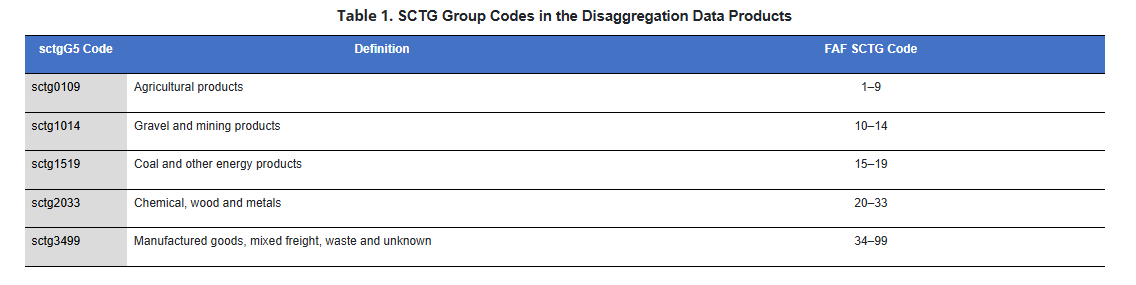

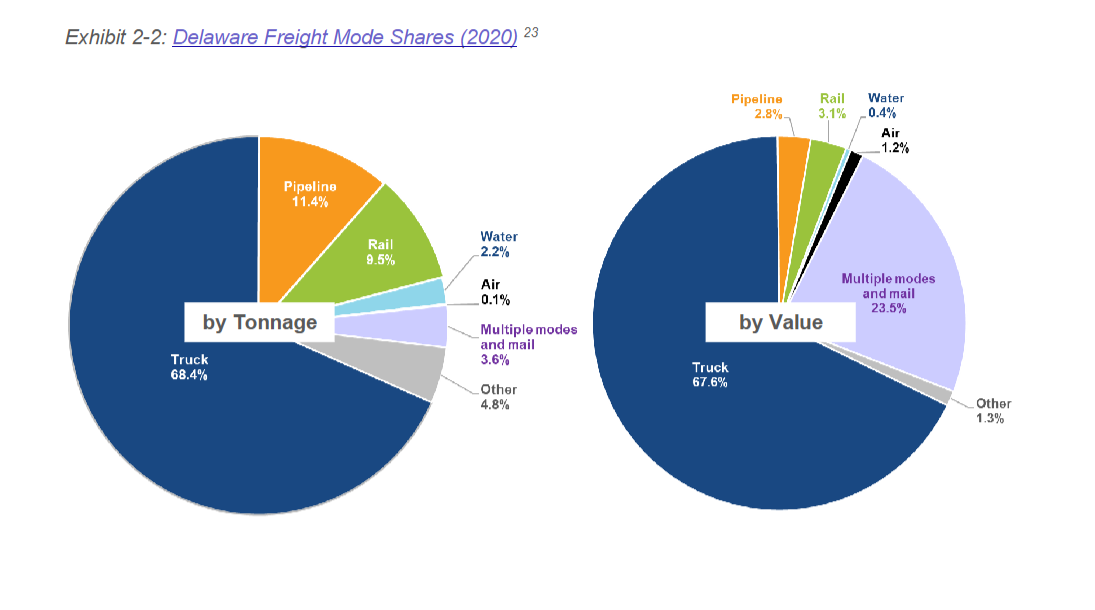

In [ ]:
# Total tonnage
tonnage = df[["tons_2022","mode"]].groupby("mode").sum()/df[["tons_2022","mode"]].groupby("mode").sum().sum() * 100
tonnage = tonnage.sort_values(by="tons_2022",ascending=False)
tonnage.columns = ["Tons_2022 [%]"]
tonnage
# It is not possible to do it by value using the current dataset.

,Tons_2022 [%]
mode,
Truck and Air,76.855615
Pipelines,18.952238
Rail,2.464813
Water,1.041425
Multiple modes and mail,0.685909


#New Castle


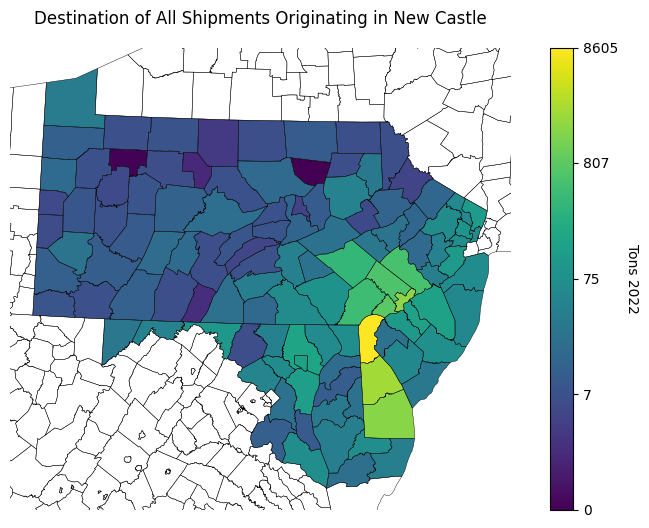

In [ ]:
domestic = df[df["dms_orig_cnty"]==10003]
cols = ['dms_orig_cnty', 'dms_dest_cnty', 'tons_2022', 'products', 'mode']
domestic = domestic[cols]
domestic = domestic.groupby(["dms_orig_cnty","dms_dest_cnty"]).sum(numeric_only=True)

# Convert the 'county' column in 'geo' to int64
geo['county'] = geo['county'].astype(int)
# Merge
geo_mod = geo.merge(domestic, left_on="county", right_on="dms_dest_cnty")
geo_mod['tons_2022'] = geo_mod['tons_2022'].fillna(0)

fig, ax = plt.subplots(figsize=(10, 6))
geo_mod.plot(column=np.log10(geo_mod["tons_2022"]), cmap="viridis", legend=True, ax=ax)
cty.plot(facecolor = "none", lw = 0.3, ax=ax)
cbar = fig.axes[1] # The colorbar is added as the second axes
cbar.tick_params(labelsize=10)

s = np.linspace(np.log10(geo_mod["tons_2022"]).min(), np.log10(geo_mod["tons_2022"]).max(), 5)
np.power(10, s)

cbar.set_ylabel("Tons 2022", rotation=270, labelpad=15)
cbar.set_yticks(s)
cbar.set_yticklabels(np.power(10, s).astype(int))

ax.set_title("Destination of All Shipments Originating in New Castle")
ax.set_xlim(-872654.6881407102, 1175645.9631276887)
ax.set_ylim(-126030.14811918007, 1761046.4581477903)
ax.set_axis_off()

fig.show()

domestic = df[df["dms_dest_cnty"]==10003]
cols = ['dms_orig_cnty', 'dms_dest_cnty', 'tons_2022', 'products', 'mode']
domestic = domestic[cols]
domestic = domestic.groupby(["dms_orig_cnty","dms_dest_cnty"]).sum(numeric_only=True)

# Convert the 'county' column in 'geo' to int64
geo['county'] = geo['county'].astype(int)
# Merge
geo_mod = geo.merge(domestic, left_on="county", right_on="dms_orig_cnty")
geo_mod['tons_2022'] = geo_mod['tons_2022'].fillna(0)

fig, ax = plt.subplots(figsize=(10, 6))
geo_mod.plot(column=np.log10(geo_mod["tons_2022"]), cmap="viridis", legend=True, ax=ax)
cty.plot(facecolor = "none", lw = 0.3, ax=ax)
cbar = fig.axes[1] # The colorbar is added as the second axes
cbar.tick_params(labelsize=10)

s = np.linspace(np.log10(geo_mod["tons_2022"]).min(), np.log10(geo_mod["tons_2022"]).max(), 5)
np.power(10, s)

cbar.set_ylabel("Tons 2022", rotation=270, labelpad=15)
cbar.set_yticks(s)
cbar.set_yticklabels(np.power(10, s).astype(int))

ax.set_title("Origin of All Shipments with Final Destination in New Castle")
ax.set_xlim(-872654.6881407102, 1175645.9631276887)
ax.set_ylim(-126030.14811918007, 1761046.4581477903)
ax.set_axis_off()

fig.show()

In [ ]:
df = df[["dms_orig_cnty",	"dms_dest_cnty",	"tons_2022",	"products",	"mode",	"trade"]]
nc_origin = df[df["dms_orig_cnty"]==10003]
nc_origin = nc_origin[nc_origin["mode"]=="Truck and Air"]
nc_origin = nc_origin.groupby(["dms_orig_cnty","dms_dest_cnty",	"products",	"mode",	"trade"]).sum(numeric_only=True).reset_index()
nc_origin["dms_dest_cnty"] = nc_origin.reset_index().dms_dest_cnty.astype(str).str.zfill(5)
nc_origin["dms_orig_cnty"] = nc_origin.reset_index().dms_dest_cnty.astype(str).str.zfill(5)
nc_origin = nc_origin.merge(cty[["county", "name"]], left_on="dms_dest_cnty", right_on="county")
nc_origin.groupby(["dms_dest_cnty","name"]).sum(numeric_only=True).sort_values(by="tons_2022", ascending=False).head(20)

,,tons_2022
dms_dest_cnty,name,
10003,New Castle County,5813.158123
10001,Kent County,2122.457222
10005,Sussex County,963.553928
42101,Philadelphia County,425.993213
42091,Montgomery County,286.901440
42017,Bucks County,216.956313
42045,Delaware County,171.011856
42029,Chester County,163.650032
34007,Camden County,151.729184


In [ ]:
df = df[["dms_orig_cnty",	"dms_dest_cnty",	"tons_2022",	"products",	"mode",	"trade"]]
nc_dest = df[df["dms_dest_cnty"]==10003]
nc_dest = nc_dest[nc_dest["mode"]=="Truck and Air"]
nc_dest = nc_dest.groupby(["dms_orig_cnty","dms_dest_cnty",	"products",	"mode",	"trade"]).sum(numeric_only=True).reset_index()
nc_dest["dms_dest_cnty"] = nc_dest.reset_index().dms_dest_cnty.astype(str).str.zfill(5)
nc_dest["dms_orig_cnty"] = nc_dest.reset_index().dms_orig_cnty.astype(str).str.zfill(5)
nc_dest = nc_dest.merge(cty[["county", "name"]], left_on="dms_orig_cnty", right_on="county")
nc_dest.groupby(["dms_orig_cnty","name"]).sum(numeric_only=True).sort_values(by="tons_2022", ascending=False).head(20)


,,tons_2022
dms_orig_cnty,name,
10003,New Castle County,5813.158123
10001,Kent County,1928.292751
10005,Sussex County,1367.655093
42091,Montgomery County,207.003814
34005,Burlington County,204.726200
42101,Philadelphia County,204.216084
34007,Camden County,193.448933
34015,Gloucester County,147.822523
24043,Washington County,147.372082


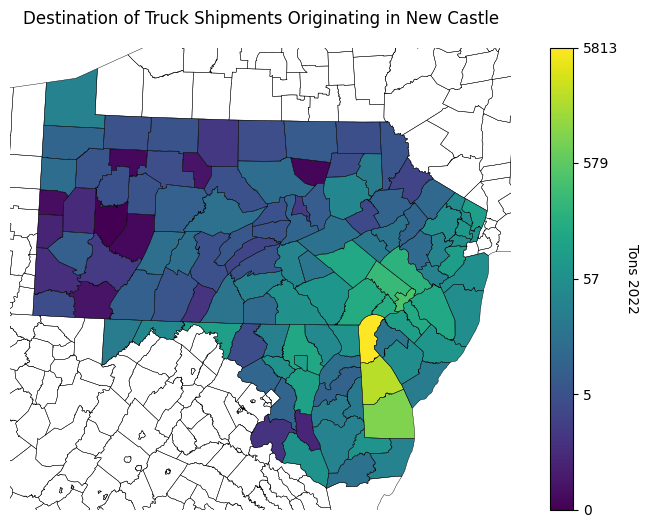

In [ ]:
domestic = df[df["dms_orig_cnty"]==10003]
domestic = domestic[domestic["mode"]=="Truck and Air"]
cols = ['dms_orig_cnty', 'dms_dest_cnty', 'tons_2022', 'products', 'mode']
domestic = domestic[cols]
domestic = domestic.groupby(["dms_orig_cnty","dms_dest_cnty"]).sum(numeric_only=True)

# Convert the 'county' column in 'geo' to int64
geo['county'] = geo['county'].astype(int)
# Merge
geo_mod = geo.merge(domestic, left_on="county", right_on="dms_dest_cnty")
geo_mod['tons_2022'] = geo_mod['tons_2022'].fillna(0)

fig, ax = plt.subplots(figsize=(10, 6))
geo_mod.plot(column=np.log10(geo_mod["tons_2022"]), cmap="viridis", legend=True, ax=ax)
cty.plot(facecolor = "none", lw = 0.3, ax=ax)
cbar = fig.axes[1] # The colorbar is added as the second axes
cbar.tick_params(labelsize=10)

s = np.linspace(np.log10(geo_mod["tons_2022"]).min(), np.log10(geo_mod["tons_2022"]).max(), 5)
np.power(10, s)

cbar.set_ylabel("Tons 2022", rotation=270, labelpad=15)
cbar.set_yticks(s)
cbar.set_yticklabels(np.power(10, s).astype(int))

ax.set_title("Destination of Truck Shipments Originating in New Castle")
ax.set_xlim(-872654.6881407102, 1175645.9631276887)
ax.set_ylim(-126030.14811918007, 1761046.4581477903)
ax.set_axis_off()

fig.show()

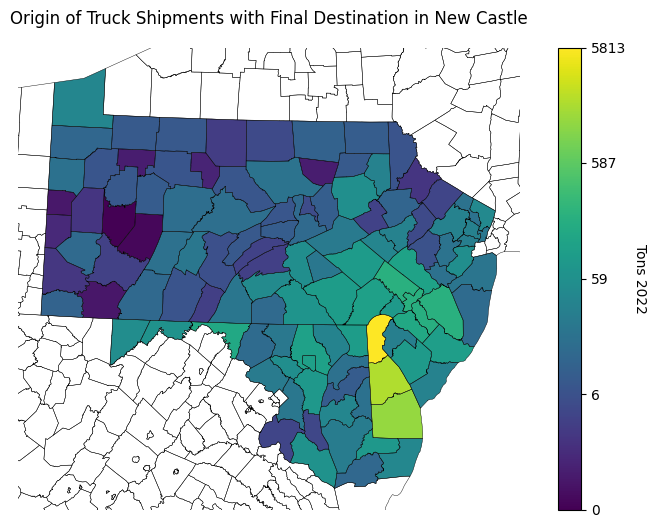

In [ ]:
domestic = df[df["dms_dest_cnty"]==10003]
domestic = domestic[domestic["mode"]=="Truck and Air"]
cols = ['dms_orig_cnty', 'dms_dest_cnty', 'tons_2022', 'products', 'mode']
domestic = domestic[cols]
domestic = domestic.groupby(["dms_orig_cnty","dms_dest_cnty"]).sum(numeric_only=True)

# Convert the 'county' column in 'geo' to int64
geo['county'] = geo['county'].astype(int)
# Merge
geo_mod = geo.merge(domestic, left_on="county", right_on="dms_orig_cnty")
geo_mod['tons_2022'] = geo_mod['tons_2022'].fillna(0)

fig, ax = plt.subplots(figsize=(10, 6))
geo_mod.plot(column=np.log10(geo_mod["tons_2022"]), cmap="viridis", legend=True, ax=ax)
cty.plot(facecolor = "none", lw = 0.3, ax=ax)
cbar = fig.axes[1] # The colorbar is added as the second axes
cbar.tick_params(labelsize=10)

s = np.linspace(np.log10(geo_mod["tons_2022"]).min(), np.log10(geo_mod["tons_2022"]).max(), 5)
np.power(10, s)

cbar.set_ylabel("Tons 2022", rotation=270, labelpad=15)
cbar.set_yticks(s)
cbar.set_yticklabels(np.power(10, s).astype(int))

ax.set_title("Origin of Truck Shipments with Final Destination in New Castle")
ax.set_xlim(-872654.6881407102, 1175645.9631276887)
ax.set_ylim(-126030.14811918007, 1761046.4581477903)
ax.set_axis_off()

fig.show()

,,tons_2022
dms_dest_cnty,name,
10003,New Castle County,1928.292751
10001,Kent County,760.780097
10005,Sussex County,358.949953
42101,Philadelphia County,120.965324
42091,Montgomery County,81.706590
42017,Bucks County,61.351093
42045,Delaware County,48.443495
34007,Camden County,47.536967
42029,Chester County,46.336585


In [ ]:
geo.head()

,county,geometry
0,2013,"MULTIPOLYGON (((-13099887.859 18294009.946, -1..."
1,2016,"MULTIPOLYGON (((-13450293.076 23734187.24, -13..."
2,28101,"POLYGON ((-3586827.422 -1697216.738, -3586731...."
3,28027,"POLYGON ((-3963783.221 -1114067.124, -3965040...."
4,22065,"MULTIPOLYGON (((-4205435.554 -1782300.187, -42..."


In [ ]:
df = df[["dms_orig_cnty",	"dms_dest_cnty",	"tons_2022",	"products",	"mode",	"trade"]]
nc_dest = df[df["mode"]=="Truck and Air"]
nc_dest = df[df["dms_dest_cnty"]==10003]
nc_dest = nc_dest.groupby(["dms_orig_cnty","dms_dest_cnty",	"products",	"mode",	"trade"]).sum(numeric_only=True).reset_index()
nc_dest["dms_dest_cnty"] = nc_dest.reset_index().dms_dest_cnty.astype(str).str.zfill(5)
nc_dest["dms_orig_cnty"] = nc_dest.reset_index().dms_orig_cnty.astype(str).str.zfill(5)
nc_dest = nc_dest.merge(geo[["county", "name"]], left_on="dms_orig_cnty", right_on="county")
nc_dest.groupby(["dms_orig_cnty","name"]).sum(numeric_only=True).sort_values(by="tons_2022", ascending=False).head(41)

,,tons_2022
dms_orig_cnty,name,
10003,New Castle County,8605.178303
10001,Kent County,1954.421014
10005,Sussex County,1400.900168
42123,Warren County,368.008996
42091,Montgomery County,211.396937
42101,Philadelphia County,207.354691
34005,Burlington County,207.277580
42083,McKean County,202.382855
34007,Camden County,195.828112


#Kent

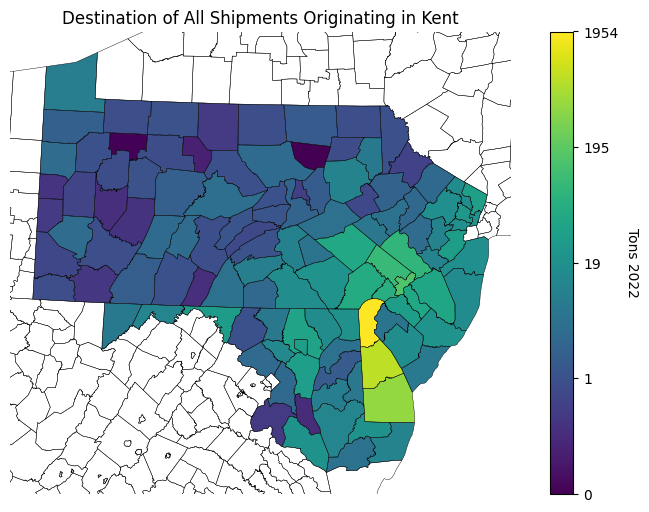

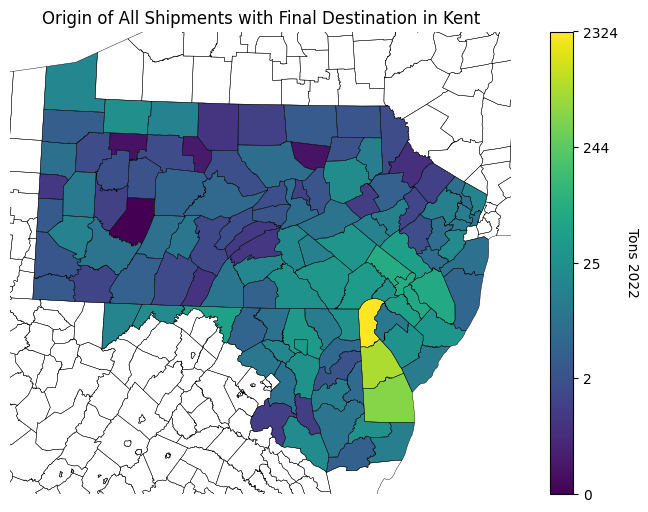

In [ ]:
domestic = df[df["dms_orig_cnty"]==10001]
cols = ['dms_orig_cnty', 'dms_dest_cnty', 'tons_2022', 'products', 'mode']
domestic = domestic[cols]
domestic = domestic.groupby(["dms_orig_cnty","dms_dest_cnty"]).sum(numeric_only=True)
geo['county'] = geo['county'].astype(int)
geo_mod = geo.merge(domestic, left_on="county", right_on="dms_dest_cnty")
geo_mod['tons_2022'] = geo_mod['tons_2022'].fillna(0)

fig, ax = plt.subplots(figsize=(10, 6))
geo_mod.plot(column=np.log10(geo_mod["tons_2022"]), cmap="viridis", legend=True, ax=ax)
geo.plot(facecolor = "none", lw = 0.3, ax=ax)
cbar = fig.axes[1] # The colorbar is added as the second axes
cbar.tick_params(labelsize=10)
s = np.linspace(np.log10(geo_mod["tons_2022"]).min(), np.log10(geo_mod["tons_2022"]).max(), 5)
np.power(10, s)
cbar.set_ylabel("Tons 2022", rotation=270, labelpad=15)
cbar.set_yticks(s)
cbar.set_yticklabels(np.power(10, s).astype(int))
ax.set_title("Destination of All Shipments Originating in Kent")
ax.set_xlim(-872654.6881407102, 1175645.9631276887)
ax.set_ylim(-126030.14811918007, 1761046.4581477903)
ax.set_axis_off()

fig.show()

domestic = df[df["dms_dest_cnty"]==10001]
cols = ['dms_orig_cnty', 'dms_dest_cnty', 'tons_2022', 'products', 'mode']
domestic = domestic[cols]
domestic = domestic.groupby(["dms_orig_cnty","dms_dest_cnty"]).sum(numeric_only=True)
geo['county'] = geo['county'].astype(int)
geo_mod = geo.merge(domestic, left_on="county", right_on="dms_orig_cnty")
geo_mod['tons_2022'] = geo_mod['tons_2022'].fillna(0)

fig, ax = plt.subplots(figsize=(10, 6))
geo_mod.plot(column=np.log10(geo_mod["tons_2022"]), cmap="viridis", legend=True, ax=ax)
geo.plot(facecolor = "none", lw = 0.3, ax=ax)
cbar = fig.axes[1] # The colorbar is added as the second axes
cbar.tick_params(labelsize=10)
s = np.linspace(np.log10(geo_mod["tons_2022"]).min(), np.log10(geo_mod["tons_2022"]).max(), 5)
np.power(10, s)
cbar.set_ylabel("Tons 2022", rotation=270, labelpad=15)
cbar.set_yticks(s)
cbar.set_yticklabels(np.power(10, s).astype(int))
ax.set_title("Origin of All Shipments with Final Destination in Kent")
ax.set_xlim(-872654.6881407102, 1175645.9631276887)
ax.set_ylim(-126030.14811918007, 1761046.4581477903)
ax.set_axis_off()

fig.show()

In [ ]:
df = df[["dms_orig_cnty",	"dms_dest_cnty",	"tons_2022",	"products",	"mode",	"trade"]]
k_origin = df[df["dms_orig_cnty"]==10001]
k_origin = k_origin[k_origin["mode"]=="Truck and Air"]
k_origin = k_origin.groupby(["dms_orig_cnty","dms_dest_cnty",	"products",	"mode",	"trade"]).sum(numeric_only=True).reset_index()
k_origin["dms_dest_cnty"] = k_origin.reset_index().dms_dest_cnty.astype(str).str.zfill(5)
k_origin["dms_orig_cnty"] = k_origin.reset_index().dms_orig_cnty.astype(str).str.zfill(5)
geo["county"] = geo["county"].astype(str).str.zfill(5)
k_origin = k_origin.merge(geo[["county", "name"]], left_on="dms_dest_cnty", right_on="county")
k_origin.groupby(["dms_dest_cnty","name"]).sum(numeric_only=True).sort_values(by="tons_2022", ascending=False).head(40)

,,tons_2022
dms_dest_cnty,name,
10003,New Castle County,1928.292751
10001,Kent County,760.780097
10005,Sussex County,358.949953
42101,Philadelphia County,120.965324
42091,Montgomery County,81.706590
42017,Bucks County,61.351093
42045,Delaware County,48.443495
34007,Camden County,47.536967
42029,Chester County,46.336585


In [ ]:
df = df[["dms_orig_cnty",	"dms_dest_cnty",	"tons_2022",	"products",	"mode",	"trade"]]
k_dest = df[df["dms_dest_cnty"]==10001]
k_dest = k_dest[k_dest["mode"]=="Truck and Air"]
k_dest = k_dest.groupby(["dms_orig_cnty","dms_dest_cnty",	"products",	"mode",	"trade"]).sum(numeric_only=True).reset_index()
k_dest["dms_dest_cnty"] = k_dest.reset_index().dms_dest_cnty.astype(str).str.zfill(5)
k_dest["dms_orig_cnty"] = k_dest.reset_index().dms_orig_cnty.astype(str).str.zfill(5)
k_dest = k_dest.merge(geo[["county", "name"]], left_on="dms_orig_cnty", right_on="county")
a = k_dest.groupby(["dms_orig_cnty","name"]).sum(numeric_only=True).sort_values(by="tons_2022", ascending=False).head(20)

df = df[["dms_orig_cnty",	"dms_dest_cnty",	"tons_2022",	"products",	"mode",	"trade"]]
k_orig = df[df["dms_orig_cnty"]==10001]
k_orig = k_orig[k_orig["mode"]=="Truck and Air"]
k_orig = k_orig.groupby(["dms_orig_cnty","dms_dest_cnty",	"products",	"mode",	"trade"]).sum(numeric_only=True).reset_index()
k_orig["dms_dest_cnty"] = k_orig.reset_index().dms_dest_cnty.astype(str).str.zfill(5)
k_orig["dms_orig_cnty"] = k_orig.reset_index().dms_orig_cnty.astype(str).str.zfill(5)
k_orig = k_orig.merge(geo[["county", "name"]], left_on="dms_dest_cnty", right_on="county")
b = k_orig.groupby(["dms_dest_cnty","name"]).sum(numeric_only=True).sort_values(by="tons_2022", ascending=False).head(20)

pd.concat([a,b])

,,tons_2022
,name,
10003,New Castle County,2122.457222
10001,Kent County,760.780097
10005,Sussex County,437.168165
42091,Montgomery County,70.973210
42101,Philadelphia County,70.355908
34005,Burlington County,64.956089
34007,Camden County,62.046142
34015,Gloucester County,47.419555
24043,Washington County,47.157035


#Sussex


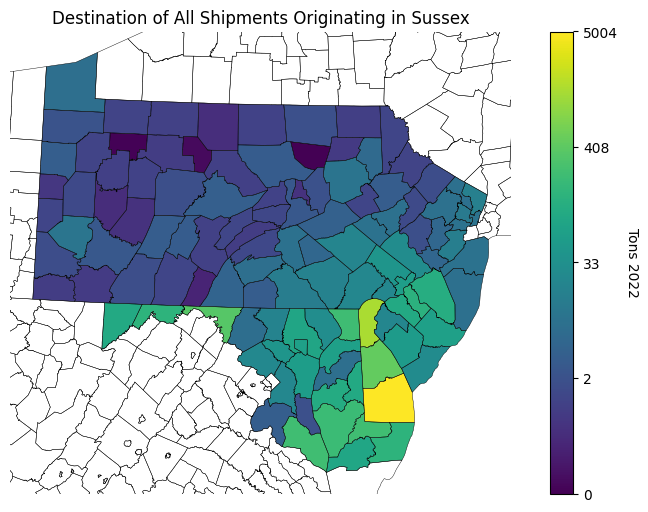

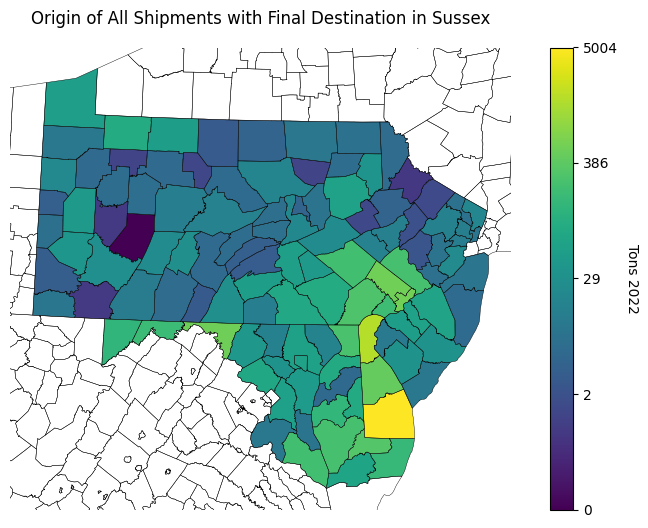

In [ ]:
domestic = df[df["dms_orig_cnty"]==10005]
cols = ['dms_orig_cnty', 'dms_dest_cnty', 'tons_2022', 'products', 'mode']
domestic = domestic[cols]
domestic = domestic.groupby(["dms_orig_cnty","dms_dest_cnty"]).sum(numeric_only=True)
geo['county'] = geo['county'].astype(int)
geo_mod = geo.merge(domestic, left_on="county", right_on="dms_dest_cnty")
geo_mod['tons_2022'] = geo_mod['tons_2022'].fillna(0)

fig, ax = plt.subplots(figsize=(10, 6))
geo_mod.plot(column=np.log10(geo_mod["tons_2022"]), cmap="viridis", legend=True, ax=ax)
geo.plot(facecolor = "none", lw = 0.3, ax=ax)
cbar = fig.axes[1] # The colorbar is added as the second axes
cbar.tick_params(labelsize=10)
s = np.linspace(np.log10(geo_mod["tons_2022"]).min(), np.log10(geo_mod["tons_2022"]).max(), 5)
np.power(10, s)
cbar.set_ylabel("Tons 2022", rotation=270, labelpad=15)
cbar.set_yticks(s)
cbar.set_yticklabels(np.power(10, s).astype(int))
ax.set_title("Destination of All Shipments Originating in Sussex")
ax.set_xlim(-872654.6881407102, 1175645.9631276887)
ax.set_ylim(-126030.14811918007, 1761046.4581477903)
ax.set_axis_off()

fig.show()

domestic = df[df["dms_dest_cnty"]==10005]
cols = ['dms_orig_cnty', 'dms_dest_cnty', 'tons_2022', 'products', 'mode']
domestic = domestic[cols]
domestic = domestic.groupby(["dms_orig_cnty","dms_dest_cnty"]).sum(numeric_only=True)
geo['county'] = geo['county'].astype(int)
geo_mod = geo.merge(domestic, left_on="county", right_on="dms_orig_cnty")
geo_mod['tons_2022'] = geo_mod['tons_2022'].fillna(0)

fig, ax = plt.subplots(figsize=(10, 6))
geo_mod.plot(column=np.log10(geo_mod["tons_2022"]), cmap="viridis", legend=True, ax=ax)
geo.plot(facecolor = "none", lw = 0.3, ax=ax)
cbar = fig.axes[1] # The colorbar is added as the second axes
cbar.tick_params(labelsize=10)
s = np.linspace(np.log10(geo_mod["tons_2022"]).min(), np.log10(geo_mod["tons_2022"]).max(), 5)
np.power(10, s)
cbar.set_ylabel("Tons 2022", rotation=270, labelpad=15)
cbar.set_yticks(s)
cbar.set_yticklabels(np.power(10, s).astype(int))
ax.set_title("Origin of All Shipments with Final Destination in Sussex")
ax.set_xlim(-872654.6881407102, 1175645.9631276887)
ax.set_ylim(-126030.14811918007, 1761046.4581477903)
ax.set_axis_off()

fig.show()

In [ ]:
df = df[["dms_orig_cnty",	"dms_dest_cnty",	"tons_2022",	"products",	"mode",	"trade"]]
k_dest = df[df["dms_dest_cnty"]==10005]
#k_dest = k_dest[k_dest["mode"]=="Truck and Air"]
k_dest = k_dest.groupby(["dms_orig_cnty","dms_dest_cnty",	"products",	"mode",	"trade"]).sum(numeric_only=True).reset_index()
k_dest["dms_dest_cnty"] = k_dest.reset_index().dms_dest_cnty.astype(str).str.zfill(5)
k_dest["dms_orig_cnty"] = k_dest.reset_index().dms_orig_cnty.astype(str).str.zfill(5)
k_dest = k_dest.merge(geo[["county", "name"]], left_on="dms_orig_cnty", right_on="county")
a = k_dest.groupby(["dms_orig_cnty","name"]).sum(numeric_only=True).sort_values(by="tons_2022", ascending=False).head(40)

df = df[["dms_orig_cnty",	"dms_dest_cnty",	"tons_2022",	"products",	"mode",	"trade"]]
k_orig = df[df["dms_orig_cnty"]==10005]
#k_orig = k_orig[k_orig["mode"]=="Truck and Air"]
k_orig = k_orig.groupby(["dms_orig_cnty","dms_dest_cnty",	"products",	"mode",	"trade"]).sum(numeric_only=True).reset_index()
k_orig["dms_dest_cnty"] = k_orig.reset_index().dms_dest_cnty.astype(str).str.zfill(5)
k_orig["dms_orig_cnty"] = k_orig.reset_index().dms_orig_cnty.astype(str).str.zfill(5)
k_orig = k_orig.merge(geo[["county", "name"]], left_on="dms_dest_cnty", right_on="county")
b = k_orig.groupby(["dms_dest_cnty","name"]).sum(numeric_only=True).sort_values(by="tons_2022", ascending=False).head(40)

pd.concat([a,b])

,,tons_2022
,name,
10005,Sussex County,5004.224493
10003,New Castle County,1613.058140
42101,Philadelphia County,563.576898
42091,Montgomery County,552.307175
24043,Washington County,523.808230
...,...,...
24013,Carroll County,19.413012
42071,Lancaster County,19.183316
34003,Bergen County,17.029500


In [ ]:
b

,,tons_2022
dms_dest_cnty,name,
10005,Sussex County,5004.224493
10003,New Castle County,1400.900168
10001,Kent County,449.135201
24043,Washington County,354.132500
24037,St. Mary's County,230.495409
24045,Wicomico County,227.443962
24015,Cecil County,219.255496
24019,Dorchester County,205.178549
24001,Allegany County,147.069323


In [ ]:
df[df["trade"] == "Export"]

,dms_orig_cnty,dms_dest_cnty,tons_2022,products,mode,trade
132369,24003,24003,0.000000,Agricultural,Truck and Air,Export
132370,24003,24003,0.000000,Agricultural,Rail,Export
132371,24003,24005,0.000000,Agricultural,Truck and Air,Export
132372,24003,24005,0.000000,Agricultural,Rail,Export
132373,24003,24013,0.000000,Agricultural,Truck and Air,Export
...,...,...,...,...,...,...
1107392,42133,42017,0.000053,"Manufacturing goods, mixed freight, waste and ...",Multiple modes and mail,Export
1107393,42133,42029,0.000037,"Manufacturing goods, mixed freight, waste and ...",Multiple modes and mail,Export
1107394,42133,42045,0.000041,"Manufacturing goods, mixed freight, waste and ...",Multiple modes and mail,Export
1107395,42133,42091,0.000066,"Manufacturing goods, mixed freight, waste and ...",Multiple modes and mail,Export


#Export/Import

In [ ]:
dir = "/content/drive/MyDrive/FreightProfiles/"
fname = "FAF_county/10 - Delaware/1.County-to-County.csv"
df = pd.read_csv(dir + fname)

dir = "/content/drive/MyDrive/FreightProfiles/"

# Import from google drive Source: Census
geo = gpd.read_file("/content/drive/MyDrive/Disertation/countyshp/tl_2010_us_county00/tl_2010_us_county00.shp")
geo = geo.to_crs("EPSG:2235")
geo = geo.rename(columns={"CNTYIDFP00": "county", "NAMELSAD00":"name"})
geo = geo[["county", "name", "geometry"]]

sctgG5 = {'sctg0109': "Agricultural",
          'sctg1014': "Gravel and mining",
          'sctg1519': "Coal and other energy",
          'sctg2033': "Chemical, wood and metals",
          'sctg3499': "Manufacturing goods, mixed freight, waste and unknown"}
df["products"] = df["sctgG5"].map(sctgG5)

modes = {11: "Truck and Air",
         2: "Rail",
         3: "Water",
         5: "Multiple modes and mail",
         6: "Pipelines"}
df["mode"] = df["dms_mode"].map(modes)

trade = {1: "Domestic Only",
         2: "Import",
         3: "Export"}

df["trade"] = df["trade_type"].map(trade)

df.drop(columns=["dms_mode", "sctgG5", "trade_type"], inplace=True)

In [ ]:
dict= {801:"Canada", 802: "Mexico", 803:"Rest of Americas", 804:"Europe",
       805:"Africa", 806:"Southern, Central, and Western Asia",
       807:"Eastern Asia", 808: "Southern Asia and Oceania"}

NC = (df["dms_orig_cnty"]==10003)| (df["dms_dest_cnty"]==10003)
K = (df["dms_orig_cnty"]==10001)| (df["dms_dest_cnty"]==10001)
S = (df["dms_orig_cnty"]==10005)| (df["dms_dest_cnty"]==10005)

DE = NC|K|S

df = df[DE]
exports = df[df["trade"]=="Export"]
exports = exports[exports["tons_2022"]>0]
imports = df[df["trade"]=="Import"]
imports = imports[imports["tons_2022"]>0]

a = exports.groupby(["fr_dest"]).sum(numeric_only=True).reset_index()[["fr_dest", "tons_2022"]]
a.columns = ["Destination", "Exported Tons"]

b = imports.groupby(["fr_orig"]).sum(numeric_only=True).reset_index()[["fr_orig", "tons_2022"]]
b.columns = ["Origin", "Imported Tons"]

imp_exp = a.merge(b, left_on="Destination", right_on="Origin", how="outer")

imp_exp["Destination"] = imp_exp["Destination"].map(dict)
imp_exp.drop(columns="Origin", inplace=True)
imp_exp


,Destination,Exported Tons,Imported Tons
0,Canada,0.001894,40.166846
1,Mexico,23.585398,136.094524
2,Rest of Americas,260.220037,1796.790901
3,Europe,93.613052,583.468476
4,Africa,21.976567,434.188489
5,"Southern, Central, and Western Asia",76.675071,369.324094
6,Eastern Asia,290.739563,109.920626
7,Southern Asia and Oceania,8.946383,157.763989


In [ ]:
dict= {801:"Canada", 802: "Mexico", 803:"Rest of Americas", 804:"Europe",
       805:"Africa", 806:"Southern, Central, and Western Asia",
       807:"Eastern Asia", 808: "Southern Asia and Oceania"}


exports = df[df["trade"]=="Export"]
exports = exports[exports["tons_2022"]>0]
imports = df[df["trade"]=="Import"]
imports = imports[imports["tons_2022"]>0]

a = exports.groupby(["dms_orig_cnty","fr_dest"]).sum(numeric_only=True).reset_index()[["dms_orig_cnty","fr_dest", "tons_2022"]]
#a.columns = ["Destination", "Exported Tons"]
a["fr_dest"] = a["fr_dest"].map(dict)
b = imports.groupby(["dms_dest_cnty","fr_orig"]).sum(numeric_only=True).reset_index()[["dms_dest_cnty","fr_orig", "tons_2022"]]
#b.columns = ["Origin", "Imported Tons"]
b["fr_orig"] = b["fr_orig"].map(dict)


In [ ]:
a.head(24)

,dms_orig_cnty,fr_dest,tons_2022
0,10001,Canada,0.000327
1,10001,Mexico,3.448886
2,10001,Rest of Americas,34.499693
3,10001,Europe,11.935331
4,10001,Africa,3.262246
5,10001,"Southern, Central, and Western Asia",12.942601
6,10001,Eastern Asia,44.140660
7,10001,Southern Asia and Oceania,1.487295
8,10003,Canada,0.001232
9,10003,Mexico,15.966835


In [ ]:
b.head(24)

,dms_dest_cnty,fr_orig,tons_2022
0,10001,Canada,4.438799
1,10001,Mexico,23.922568
2,10001,Rest of Americas,363.042878
3,10001,Europe,104.738627
4,10001,Africa,35.238436
5,10001,"Southern, Central, and Western Asia",60.866462
6,10001,Eastern Asia,20.350816
7,10001,Southern Asia and Oceania,29.251311
8,10003,Canada,14.892246
9,10003,Mexico,80.261630


In [ ]:
a = exports.groupby(["fr_dest"]).sum(numeric_only=True).reset_index()[["fr_dest", "tons_2022"]]
a.columns = ["Destination", "Exported Tons"]

b = imports.groupby(["fr_orig"]).sum(numeric_only=True).reset_index()[["fr_orig", "tons_2022"]]
b.columns = ["Origin", "Imported Tons"]

imp_exp = a.merge(b, left_on="Destination", right_on="Origin", how="outer")

imp_exp["Destination"] = imp_exp["Destination"].map(dict)
imp_exp.drop(columns="Origin", inplace=True)
imp_exp


,Destination,Exported Tons,Imported Tons
0,Canada,0.001894,40.166846
1,Mexico,23.585398,136.094524
2,Rest of Americas,260.220037,1796.790901
3,Europe,93.613052,583.468476
4,Africa,21.976567,434.188489
5,"Southern, Central, and Western Asia",76.675071,369.324094
6,Eastern Asia,290.739563,109.920626
7,Southern Asia and Oceania,8.946383,157.763989


In [ ]:
# look for what is in the freight plan
# Replicate the tables that are in the freight plan

# Commondity, what are the top commodities moving by truck

# See pipelines, extra.

# All counties.

# For now, model what are the main commodities by county.

# Make the map


# March 19th, next freigh meeting, some interesting maps or pdf with interesting tables.
# Request particular analysis.

# Pharmaceutical go by air.

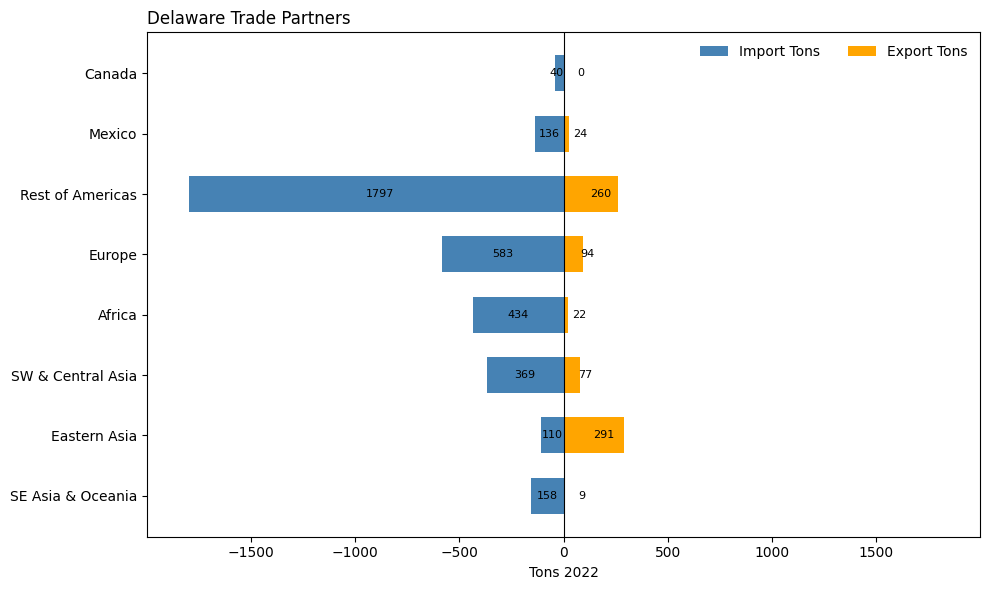

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the image
trade_partners = ['Canada', 'Mexico', 'Rest of Americas', 'Europe', 'Africa',
                 'SW & Central Asia', 'Eastern Asia', 'SE Asia & Oceania']
import_ktons = [ 40,  136, 1797, 583, 434, 369, 110, 158 ]
export_ktons = [ 0, 24, 260, 94, 22, 77, 291, 9]


# Create the horizontal bar chart
y_pos = np.arange(len(trade_partners))

plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Plot import bars (negative values to the left)
plt.barh(y_pos, [-x for x in import_ktons], color='steelblue', label='Import Tons', height=0.6)

# Plot export bars (positive values to the right)
plt.barh(y_pos, export_ktons, color='orange', label='Export Tons', height=0.6)

# Add data labels
for i, (import_val, export_val) in enumerate(zip(import_ktons, export_ktons)):
    plt.text(-import_val / 2-50, y_pos[i], str(import_val), va='center', ha='left', color='black', fontsize=8)
    plt.text(export_val / 2+100, y_pos[i], str(export_val), va='center', ha='right', color='black', fontsize=8)

# Set y-axis labels
plt.yticks(y_pos, trade_partners)

# Set title and labels
plt.title('Delaware Trade Partners', loc='left')
plt.xlabel('Tons 2022')

# Add legend
plt.legend(loc='upper right', ncol=2, frameon=False)

# Invert y-axis to have the first item at the top
plt.gca().invert_yaxis()

# Set x-axis limits to center at 0
max_val = max(max(import_ktons), max(export_ktons))
plt.xlim(-max_val - 200, max_val + 200)

# Add vertical line at 0
plt.axvline(0, color='black', linewidth=0.8)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()